# Topic Classification

(a) Load the Reuters newswire topic classification data provided in Keras.

(b) Split the data into training,validation and testing subsets

(c) Build a network with a trainable embedding layer and two fully connected layers (including the output layer)

(d) Train and evaluate accuracy for topic classification with both trainable and loaded embedding layer.

(e) Compare the results and draw conclusion

(f) Use an LSTM layer to replace the fully connected layer. Then train and evaluate. Compare the results and draw conclusions.

(g) Add an additional LSTM layer and repeat the evaluation. Make sure that the first LSTM layer is set to return the full sequence of output

In [5]:
# Imports
from keras.datasets import reuters
from keras import preprocessing
from keras import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np

In [36]:
# plotting function:
def generate_plots(history):
    #accuracies
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #loss curves
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### (a) Load the Reuters newswire topic classification data provided in Keras.

In [18]:
max_features = 10000
embedding_dim = 100
maxlen = 100

(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words = max_features)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,maxlen=maxlen)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### (b) Split the data into training,validation and testing subsets

In [19]:
print(f'Size X_train: {len(X_train)}')
print(f'Size y_train: {len(y_train)}')

print(f'Size X_test: {len(X_test)}')
print(f'Size y_test: {len(y_test)}')

Size X_train: 8982
Size y_train: 8982
Size X_test: 2246
Size y_test: 2246


Total of 11,228 samples.
Want a 70, 15, 15 split:

7860 train, 1684 test, 1684, val

In [20]:
# Let's start by taking samples from training set and adding to test set to get us to 7860 train samples:
num_to_take = 8982 - 7860
X_test = np.concatenate((X_test, X_train[-num_to_take:])) # taking the last 1122 samples and adding to X_test,
y_test = np.concatenate((y_test, y_train[-num_to_take:]))

# Now we need to make sure that we only take from 0:7860 in X-test and y_test
X_train = X_train[0:7860]
y_train = y_train[0:7860]

#Now we need to split up the testing sets by dividing them equally so there is 1684 test samples, 1684 val samples
#We'll accomplish this by just taking the first 1684 from test and making those the validation samples
X_val = X_test[0:1684]
y_val = y_test[0:1684]

#Now re-assign X-test and y_test
X_test = X_test[1684:]
y_test = y_test[1684:]

#Print shapes
print(f'Train set shape X: {X_train.shape}')
print(f'Train set shape y: {y_train.shape}')

print(f'Val set shape X: {X_val.shape}')
print(f'Val set shape y: {y_val.shape}')

print(f'Test set shape X: {X_test.shape}')
print(f'Test set shape y: {y_test.shape}')


Train set shape X: (7860, 100)
Train set shape y: (7860, 46)
Val set shape X: (1684, 100)
Val set shape y: (1684, 46)
Test set shape X: (1684, 100)
Test set shape y: (1684, 46)


In [24]:
#Print shapes
print(f'Train set shape X: {X_train.shape}')
print(f'Train set shape y: {y_train.shape}')

print(f'Val set shape X: {X_val.shape}')
print(f'Val set shape y: {y_val.shape}')

print(f'Test set shape X: {X_test.shape}')
print(f'Test set shape y: {y_test.shape}')

Train set shape X: (7860, 100)
Train set shape y: (7860, 46)
Val set shape X: (1684, 100)
Val set shape y: (1684, 46)
Test set shape X: (1684, 100)
Test set shape y: (1684, 46)


### (c) Build a network with a trainable embedding layer and two fully connected layers (including the output layer)

In [25]:
def model_init():

  max_features = 10000
  embedding_dim = 100
  maxlen = 100
  model = Sequential()

  model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
  model.add(Flatten())
  model.add(Dense(8,activation='relu'))
  model.add(Dense(46,activation='softmax'))

  return model

In [30]:
model = model_init()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 10000)             0         
                                                                 
 dense_12 (Dense)            (None, 8)                 80008     
                                                                 
 dense_13 (Dense)            (None, 46)                414       
                                                                 
Total params: 1,080,422
Trainable params: 1,080,422
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
492/492 [==============================] - 2s 3ms/step - loss: 1.9821 - categorical_accuracy: 0.5108 - val_loss: 1.5648 - val_categorical_accuracy: 0.6223
Epoch 2/20
492/492 [==============================] - 1s 3ms/step - loss: 1.2002 - categorical_accuracy: 0.7070 - val_loss: 1.3806 - val_categorical_accuracy: 0.6681
Epoch 3/20
492/492 [==============================] - 1s 3ms/step - loss: 0.7696 - categorical_accuracy: 0.8019 - val_loss: 1.3880 - val_categorical_accuracy: 0.6728
Epoch 4/20
492/492 [==============================] - 1s 3ms/step - loss: 0.5101 - categorical_accuracy: 0.8729 - val_loss: 1.4314 - val_categorical_accuracy: 0.6675
Epoch 5/20
492/492 [==============================] - 1s 3ms/step - loss: 0.3647 - categorical_accuracy: 0.9187 - val_loss: 1.4673 - val_categorical_accuracy: 0.6770
Epoch 6/20
492/492 [==============================] - 1s 3ms/step - loss: 0.2879 - categorical_accuracy: 0.9384 - val_loss: 1.5069 - val_categorical_accuracy: 0.6817
Epoc

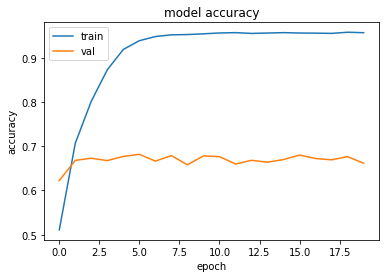

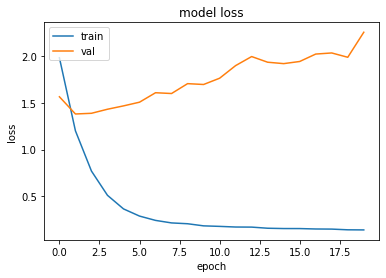

In [37]:
model = model_init()

#compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fit and plot results
history = model.fit(x=X_train, y=y_train, batch_size=16, epochs=20, validation_data=(X_val, y_val))

generate_plots(history)

Let's set the cutoff to 6 epochs, combine training and val sets and re-train and evaluate the performance


In [48]:
def eval_model(model, X_test, y_test):
  res = model.evaluate(X_test, y_test)
  print(f'Loss: {np.round(res[0], 3)}')
  print(f'Acc: {np.round(res[1], 3)}')
  # return res

In [41]:
model = model_init()

#compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fit and plot results
history = model.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=16, epochs=6)

# generate_plots(history)
eval_model(model)

Epoch 1/6
597/597 [==============================] - 2s 3ms/step - loss: 1.9085 - categorical_accuracy: 0.5088
Epoch 2/6
597/597 [==============================] - 2s 3ms/step - loss: 1.0899 - categorical_accuracy: 0.7310
Epoch 3/6
597/597 [==============================] - 2s 3ms/step - loss: 0.6730 - categorical_accuracy: 0.8339
Epoch 4/6
597/597 [==============================] - 2s 3ms/step - loss: 0.4421 - categorical_accuracy: 0.9008
Epoch 5/6
597/597 [==============================] - 2s 3ms/step - loss: 0.3252 - categorical_accuracy: 0.9305
Epoch 6/6
53/53 [==============================] - 0s 2ms/step - loss: 1.5629 - categorical_accuracy: 0.7013
Loss: 1.563
Acc: 0.701


In [47]:
model.save('naive_topicmodel.h5')

### (d) Train and evaluate accuracy for topic classification with both trainable and loaded embedding layer. and 
### (e) Compare the results and draw conclusion

Using glove again

In [42]:
glove_dir = '/content/'
embeddings_index = {}

f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()
print("Found %s words vectors." %len(embeddings_index))

# Build an embedding matrix to load the embedding layer
embedding_matrix = np.zeros((max_features,embedding_dim))

for word,i in reuters.get_word_index().items():
    if i < max_features:
        embeddings_vector = embeddings_index.get(word)
        if embeddings_vector is not None:
            embedding_matrix[i] = embeddings_vector

Found 31776 words vectors.
550378/550378 [==============================] - 0s 0us/step


In [43]:
def model_glove(trainable:bool):

  model = Sequential()
  max_features = 10000
  embedding_dim = 100
  maxlen = 100

  model.add(Embedding(max_features,embedding_dim,input_length=maxlen))
  model.add(Flatten())
  model.add(Dense(8,activation='relu'))
  model.add(Dense(46,activation='softmax'))

  model.layers[0].set_weights([embedding_matrix])
  model.layers[0].trainable = trainable

  return model


In [44]:
modelglovetF = model_glove(False)
modelglovetF.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_14 (Flatten)        (None, 10000)             0         
                                                                 
 dense_28 (Dense)            (None, 8)                 80008     
                                                                 
 dense_29 (Dense)            (None, 46)                414       
                                                                 
Total params: 1,080,422
Trainable params: 80,422
Non-trainable params: 1,000,000
_________________________________________________________________


Epoch 1/10
492/492 [==============================] - 2s 3ms/step - loss: 2.3160 - categorical_accuracy: 0.4223 - val_loss: 2.1276 - val_categorical_accuracy: 0.4780
Epoch 2/10
492/492 [==============================] - 1s 3ms/step - loss: 1.7685 - categorical_accuracy: 0.5282 - val_loss: 2.0762 - val_categorical_accuracy: 0.4638
Epoch 3/10
492/492 [==============================] - 1s 3ms/step - loss: 1.5412 - categorical_accuracy: 0.5817 - val_loss: 2.1360 - val_categorical_accuracy: 0.4952
Epoch 4/10
492/492 [==============================] - 1s 3ms/step - loss: 1.3690 - categorical_accuracy: 0.6221 - val_loss: 2.1488 - val_categorical_accuracy: 0.4852
Epoch 5/10
492/492 [==============================] - 1s 3ms/step - loss: 1.2406 - categorical_accuracy: 0.6553 - val_loss: 2.2528 - val_categorical_accuracy: 0.4863
Epoch 6/10
492/492 [==============================] - 1s 3ms/step - loss: 1.1158 - categorical_accuracy: 0.6911 - val_loss: 2.3870 - val_categorical_accuracy: 0.4733
Epoc

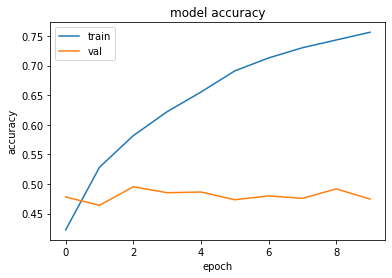

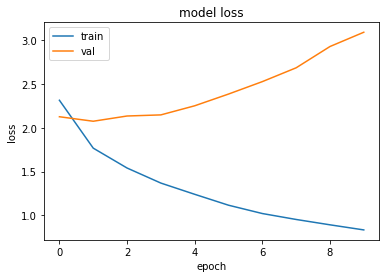

In [45]:
modelglovetF = model_glove(False)

#compile model
modelglovetF.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fit and plot results
# history = model.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=16, epochs=6)
history = modelglovetF.fit(x=X_train, y=y_train, batch_size=16, epochs=10, validation_data=(X_val, y_val))

generate_plots(history)

# eval_model(model)

Let's set the cutoff for epochs at around 3, combine data and re-train and report results for using pre-trained embedding with trainable = false

In [50]:
modelglovetF = model_glove(False)

#compile model
modelglovetF.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fit and plot results
history = modelglovetF.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=16, epochs=6)
# history = modelglovetF.fit(x=X_train, y=y_train, batch_size=16, epochs=10, validation_data=(X_val, y_val))

# generate_plots(history)

eval_model(modelglovetF, X_test, y_test)


Epoch 1/6
597/597 [==============================] - 2s 2ms/step - loss: 2.4248 - categorical_accuracy: 0.4119
Epoch 2/6
597/597 [==============================] - 1s 2ms/step - loss: 1.9217 - categorical_accuracy: 0.4829
Epoch 3/6
597/597 [==============================] - 1s 2ms/step - loss: 1.7728 - categorical_accuracy: 0.5105
Epoch 4/6
597/597 [==============================] - 1s 2ms/step - loss: 1.6533 - categorical_accuracy: 0.5372
Epoch 5/6
597/597 [==============================] - 1s 2ms/step - loss: 1.5401 - categorical_accuracy: 0.5614
Epoch 6/6
53/53 [==============================] - 0s 2ms/step - loss: 2.3039 - categorical_accuracy: 0.4644
Loss: 2.304
Acc: 0.464


In [51]:
modelglovetF.save('glovetopicmodel_trainableFalse.h5')

.46% categorical accuracy, let's set trainable=True and re-evaluate

Epoch 1/10
492/492 [==============================] - 2s 3ms/step - loss: 2.2935 - categorical_accuracy: 0.4427 - val_loss: 1.9069 - val_categorical_accuracy: 0.5042
Epoch 2/10
492/492 [==============================] - 2s 3ms/step - loss: 1.6444 - categorical_accuracy: 0.5636 - val_loss: 1.8021 - val_categorical_accuracy: 0.5392
Epoch 3/10
492/492 [==============================] - 2s 3ms/step - loss: 1.3772 - categorical_accuracy: 0.6192 - val_loss: 1.7884 - val_categorical_accuracy: 0.5570
Epoch 4/10
492/492 [==============================] - 1s 3ms/step - loss: 1.1998 - categorical_accuracy: 0.6537 - val_loss: 1.8506 - val_categorical_accuracy: 0.5665
Epoch 5/10
492/492 [==============================] - 2s 3ms/step - loss: 1.0602 - categorical_accuracy: 0.6831 - val_loss: 1.8941 - val_categorical_accuracy: 0.5760
Epoch 6/10
492/492 [==============================] - 1s 3ms/step - loss: 0.9535 - categorical_accuracy: 0.7126 - val_loss: 2.0245 - val_categorical_accuracy: 0.5802
Epoc

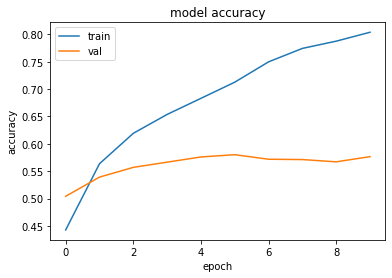

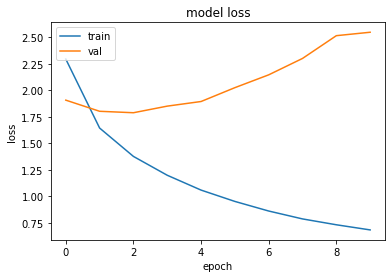

In [52]:
modelglovetT = model_glove(True)

#compile model
modelglovetT.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fit and plot results
# history = model.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=16, epochs=6)
history = modelglovetT.fit(x=X_train, y=y_train, batch_size=16, epochs=10, validation_data=(X_val, y_val))

generate_plots(history)

# eval_model(model)

Let's set the epoch cutoff to 7, combine training + val data and re-train and evaluate the results

In [53]:
modelglovetT = model_glove(True)

#compile model
modelglovetT.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fit and plot results
history = modelglovetT.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=16, epochs=7)
# history = modelglovetT.fit(x=X_train, y=y_train, batch_size=16, epochs=10, validation_data=(X_val, y_val))

# generate_plots(history)

eval_model(modelglovetT, X_test, y_test)


Epoch 1/7
597/597 [==============================] - 2s 3ms/step - loss: 2.2335 - categorical_accuracy: 0.4539
Epoch 2/7
597/597 [==============================] - 2s 3ms/step - loss: 1.5200 - categorical_accuracy: 0.5831
Epoch 3/7
597/597 [==============================] - 2s 3ms/step - loss: 1.2123 - categorical_accuracy: 0.6547
Epoch 4/7
597/597 [==============================] - 2s 3ms/step - loss: 0.9928 - categorical_accuracy: 0.7164
Epoch 5/7
597/597 [==============================] - 2s 3ms/step - loss: 0.8279 - categorical_accuracy: 0.7688
Epoch 6/7
597/597 [==============================] - 2s 3ms/step - loss: 0.7202 - categorical_accuracy: 0.7991
Epoch 7/7
53/53 [==============================] - 0s 2ms/step - loss: 2.2152 - categorical_accuracy: 0.6051
Loss: 2.215
Acc: 0.605


Comparing results: with using just the glove embedding layer, we get an accuracy of .46 w/ loss of 2.304 but when we fine-tune (i.e. set trainable=True) we get an accuracy of .605 and loss of 2.215

In [55]:
modelglovetT.save('glovetopicmodel_trainableTrue.h5')

### (f) Use an LSTM layer to replace the fully connected layer. Then train and evaluate. Compare the results and draw conclusions.

In [56]:
# We'll fine-tune i.e. set trainable=True
def model_glovelstm():

  model = Sequential()
  max_features = 10000
  embedding_dim = 100
  maxlen = 100

  model.add(Embedding(max_features,embedding_dim,input_length=maxlen))
  model.add(tf.keras.layers.LSTM(64,return_sequences=True))
  model.add(Flatten())
  # model.add(Dense(8,activation='relu'))
  model.add(Dense(46,activation='softmax'))

  model.layers[0].set_weights([embedding_matrix])
  model.layers[0].trainable = True

  return model

Epoch 1/10
492/492 [==============================] - 9s 9ms/step - loss: 1.7653 - categorical_accuracy: 0.5532 - val_loss: 1.4371 - val_categorical_accuracy: 0.6342
Epoch 2/10
492/492 [==============================] - 4s 8ms/step - loss: 0.8777 - categorical_accuracy: 0.7698 - val_loss: 1.3499 - val_categorical_accuracy: 0.6550
Epoch 3/10
492/492 [==============================] - 4s 8ms/step - loss: 0.3796 - categorical_accuracy: 0.9136 - val_loss: 1.5194 - val_categorical_accuracy: 0.6734
Epoch 4/10
492/492 [==============================] - 4s 8ms/step - loss: 0.2597 - categorical_accuracy: 0.9487 - val_loss: 1.5715 - val_categorical_accuracy: 0.6615
Epoch 5/10
492/492 [==============================] - 4s 8ms/step - loss: 0.2315 - categorical_accuracy: 0.9552 - val_loss: 1.4198 - val_categorical_accuracy: 0.6734
Epoch 6/10
492/492 [==============================] - 4s 8ms/step - loss: 0.2189 - categorical_accuracy: 0.9545 - val_loss: 1.4890 - val_categorical_accuracy: 0.6627
Epoc

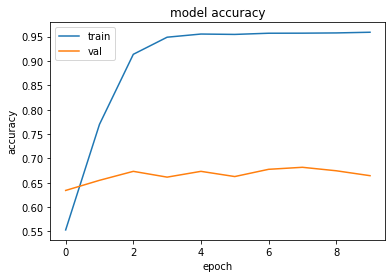

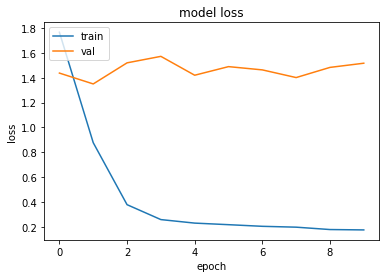

In [59]:
modelgloveLSTM1 = model_glovelstm()

#compile model
modelgloveLSTM1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fit and plot results
# history = model.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=16, epochs=6)
history = modelgloveLSTM1.fit(x=X_train, y=y_train, batch_size=16, epochs=10, validation_data=(X_val, y_val))

generate_plots(history)

# eval_model(model)

Setting epoch cutoff to 7 epochs, combining training and val data and re-training to evaluate performance

In [60]:
modelgloveLSTM1 = model_glovelstm()

#compile model
modelgloveLSTM1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fit and plot results
history = modelgloveLSTM1.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=16, epochs=7)
# history = modelgloveLSTM1.fit(x=X_train, y=y_train, batch_size=16, epochs=10, validation_data=(X_val, y_val))

# generate_plots(history)

eval_model(modelgloveLSTM1, X_test, y_test)


Epoch 1/7
597/597 [==============================] - 6s 7ms/step - loss: 1.7071 - categorical_accuracy: 0.5738
Epoch 2/7
597/597 [==============================] - 4s 7ms/step - loss: 0.8218 - categorical_accuracy: 0.7827
Epoch 3/7
597/597 [==============================] - 4s 7ms/step - loss: 0.3738 - categorical_accuracy: 0.9129
Epoch 4/7
597/597 [==============================] - 4s 7ms/step - loss: 0.2789 - categorical_accuracy: 0.9426
Epoch 5/7
597/597 [==============================] - 4s 7ms/step - loss: 0.2499 - categorical_accuracy: 0.9478
Epoch 6/7
597/597 [==============================] - 4s 7ms/step - loss: 0.2287 - categorical_accuracy: 0.9520
Epoch 7/7
53/53 [==============================] - 1s 5ms/step - loss: 1.4506 - categorical_accuracy: 0.6942
Loss: 1.451
Acc: 0.694


When using dense layer we had accuracy of around .605 and loss of around 2.2, now with using LSTM with 64 units we get an accuracy of .694 and a loss of 1.451. So there is definite improvement

In [61]:
modelgloveLSTM1.save('modelglove1LSTM.h5')

### (g) Add an additional LSTM layer and repeat the evaluation. Make sure that the first LSTM layer is set to return the full sequence of outputs

In [62]:
# We'll fine-tune i.e. set trainable=True
def model_glovelstm2():

  model = Sequential()
  max_features = 10000
  embedding_dim = 100
  maxlen = 100

  model.add(Embedding(max_features,embedding_dim,input_length=maxlen))
  model.add(tf.keras.layers.LSTM(64,return_sequences=True))
  model.add(tf.keras.layers.LSTM(32,return_sequences=True))

  model.add(Flatten())
  # model.add(Dense(8,activation='relu'))
  model.add(Dense(46,activation='softmax'))

  model.layers[0].set_weights([embedding_matrix])
  model.layers[0].trainable = True

  return model

Epoch 1/10
492/492 [==============================] - 9s 13ms/step - loss: 1.8737 - categorical_accuracy: 0.5187 - val_loss: 1.5042 - val_categorical_accuracy: 0.6128
Epoch 2/10
492/492 [==============================] - 6s 12ms/step - loss: 1.2255 - categorical_accuracy: 0.6816 - val_loss: 1.2929 - val_categorical_accuracy: 0.6704
Epoch 3/10
492/492 [==============================] - 6s 12ms/step - loss: 0.8061 - categorical_accuracy: 0.7883 - val_loss: 1.2225 - val_categorical_accuracy: 0.6912
Epoch 4/10
492/492 [==============================] - 6s 12ms/step - loss: 0.4684 - categorical_accuracy: 0.8770 - val_loss: 1.4128 - val_categorical_accuracy: 0.6859
Epoch 5/10
492/492 [==============================] - 6s 12ms/step - loss: 0.2957 - categorical_accuracy: 0.9317 - val_loss: 1.4341 - val_categorical_accuracy: 0.6882
Epoch 6/10
492/492 [==============================] - 6s 12ms/step - loss: 0.2340 - categorical_accuracy: 0.9459 - val_loss: 1.4730 - val_categorical_accuracy: 0.689

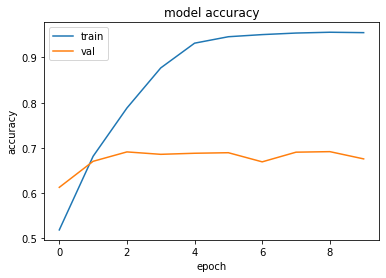

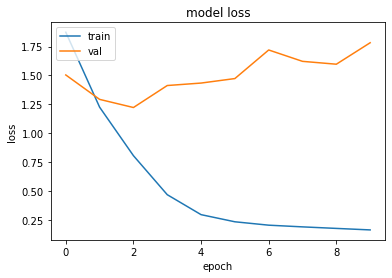

In [63]:
modelgloveLSTM2 = model_glovelstm2()

#compile model
modelgloveLSTM2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fit and plot results
# history = model.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=16, epochs=6)
history = modelgloveLSTM2.fit(x=X_train, y=y_train, batch_size=16, epochs=10, validation_data=(X_val, y_val))

generate_plots(history)

# eval_model(model)

Setting epoch cutoff to 5 epochs, combining training and val data and re-training to evaluate performance of the model

In [64]:
modelgloveLSTM2 = model_glovelstm2()

#compile model
modelgloveLSTM2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

#fit and plot results
history = modelgloveLSTM2.fit(x=np.concatenate((X_train, X_val)), y=np.concatenate((y_train, y_val)), batch_size=16, epochs=5)
# history = modelgloveLSTM2.fit(x=X_train, y=y_train, batch_size=16, epochs=10, validation_data=(X_val, y_val))

# generate_plots(history)

eval_model(modelgloveLSTM2, X_test, y_test)

Epoch 1/5
597/597 [==============================] - 9s 11ms/step - loss: 1.7790 - categorical_accuracy: 0.5435
Epoch 2/5
597/597 [==============================] - 7s 11ms/step - loss: 1.1463 - categorical_accuracy: 0.7038
Epoch 3/5
597/597 [==============================] - 6s 11ms/step - loss: 0.7567 - categorical_accuracy: 0.8023
Epoch 4/5
597/597 [==============================] - 6s 11ms/step - loss: 0.4495 - categorical_accuracy: 0.8853
Epoch 5/5
53/53 [==============================] - 1s 6ms/step - loss: 1.4612 - categorical_accuracy: 0.7001
Loss: 1.461
Acc: 0.7


Conclusion: Slight improvement (.69 --> .7) using two lstm layers instead of one

In [65]:
modelgloveLSTM2.save('modelglove2LSTM.h5')